In [1]:
from itertools import combinations

import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import scipy.stats as stats

import csv
import numpy as np
from scipy.stats import shapiro, normaltest
import glob

import os
from sklearn import tree
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For custom legend
import pydotplus
import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

Utility function

In [2]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


In [3]:
variedinputCSV = '/Users/mingshi/Desktop/DissertationProject/Week12/final-merge-all-varied-first-pass.csv'
constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'

data = pd.read_csv(variedinputCSV)


# Tranform any laughter categories,such as "[laugh]-null Discouse " into Ambiguous

In [4]:
# Nan-laughter checking
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check

Session id Participant id  Start Time - ms  End Time - ms  \
3793         S07       M002_S07           313464         314672   
4157         S07           P017           313354         313477   
11815        S20       M003_S20           352456         353354   
12055        S20           P043           352456         353354   

       Duration - ms       CV - merge - M - L - S concise merge type  \
3793            1208            [laugh]- Mirthful                NaN   
4157             123            [laugh]- Mirthful                NaN   
11815            898  [laugh]-Discourse Discourse                NaN   
12055            898  [laugh]-Discourse Discourse                NaN   

       audspec_lengthL1norm_sma_range  audspec_lengthL1norm_sma_maxPos  \
3793                         2.714319                         0.637168   
4157                         0.358312                         0.400000   
11815                        1.428272                         0.609756   
12055                        3.388762                         0.073171   

       audspec_lengthL1norm_sma_minPos  ...  mfcc_sma_de[14]_peakRangeAbs  \
3793                          0.044248  ...                      6.649413   
4157                          0.800000  ...                      0.000000   
11815                         0.963415  ...                      7.864002   
12055                         0.000000  ...                      2.763081   

       mfcc_sma_de[14]_peakRangeRel  mfcc_sma_de[14]_peakMeanAbs  \
3793                       0.440901                     2.615150   
4157                       0.000000                     0.659052   
11815                      0.465479                     3.375833   
12055                      0.237982                     2.439080   

       mfcc_sma_de[14]_peakMeanMeanDist  mfcc_sma_de[14]_peakMeanRel  \
3793                           2.911237                    -8.832350   
4157                           0.576954                     8.027590   
11815                          3.546390                   -14.276783   
12055                          2.662603                   -10.763992   

       mfcc_sma_de[14]_minRangeRel  mfcc_sma_de[14]_meanRisingSlope  \
3793                      0.532110                       112.562195   
4157                      0.000000                        31.933825   
11815                     0.449389                       195.873825   
12055                     0.654777                       128.354919   

       mfcc_sma_de[14]_stddevRisingSlope  mfcc_sma_de[14]_meanFallingSlope  \
3793                           47.665657                        124.298988   
4157                            0.000000                        -65.864784   
11815                         109.870750                        121.174484   
12055                          76.674301                         83.960907   

       mfcc_sma_de[14]_stddevFallingSlope  
3793                           104.417198  
4157                             0.000000  
11815                           58.349670  
12055                           56.204716  

[4 rows x 6380 columns]

# Data preporcessing

In [5]:
#Correctedd fixed

query_result = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'M002_S07') &
    (data['Start Time - ms'] == 313464) &
    (data['End Time - ms'] == 314672)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
    #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------   
#row 2
query_result2 = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'P017') &
    (data['Start Time - ms'] == 313354) &
    (data['End Time - ms'] == 313477)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result2.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
      #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------  
 #row 3
query_result3 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'M003_S20') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result3.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    
#row 4 corrected ness
query_result4 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'P043') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result4.index:
    data.at[idx, 'CV - merge - M - L - S'] ='[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check

Empty DataFrame
Columns: [Session id, Participant id, Start Time - ms, End Time - ms, Duration - ms, CV - merge - M - L - S, concise merge type, audspec_lengthL1norm_sma_range, audspec_lengthL1norm_sma_maxPos, audspec_lengthL1norm_sma_minPos, audspec_lengthL1norm_sma_quartile1, audspec_lengthL1norm_sma_quartile2, audspec_lengthL1norm_sma_quartile3, audspec_lengthL1norm_sma_iqr1-2, audspec_lengthL1norm_sma_iqr2-3, audspec_lengthL1norm_sma_iqr1-3, audspec_lengthL1norm_sma_percentile1.0, audspec_lengthL1norm_sma_percentile99.0, audspec_lengthL1norm_sma_pctlrange0-1, audspec_lengthL1norm_sma_stddev, audspec_lengthL1norm_sma_skewness, audspec_lengthL1norm_sma_kurtosis, audspec_lengthL1norm_sma_meanSegLen, audspec_lengthL1norm_sma_maxSegLen, audspec_lengthL1norm_sma_minSegLen, audspec_lengthL1norm_sma_segLenStddev, audspec_lengthL1norm_sma_upleveltime25, audspec_lengthL1norm_sma_upleveltime50, audspec_lengthL1norm_sma_upleveltime75, audspec_lengthL1norm_sma_upleveltime90, audspec_lengthL1norm_sma_risetime, audspec_lengthL1norm_sma_leftctime, audspec_lengthL1norm_sma_lpgain, audspec_lengthL1norm_sma_lpc0, audspec_lengthL1norm_sma_lpc1, audspec_lengthL1norm_sma_lpc2, audspec_lengthL1norm_sma_lpc3, audspec_lengthL1norm_sma_lpc4, audspecRasta_lengthL1norm_sma_range, audspecRasta_lengthL1norm_sma_maxPos, audspecRasta_lengthL1norm_sma_minPos, audspecRasta_lengthL1norm_sma_quartile1, audspecRasta_lengthL1norm_sma_quartile2, audspecRasta_lengthL1norm_sma_quartile3, audspecRasta_lengthL1norm_sma_iqr1-2, audspecRasta_lengthL1norm_sma_iqr2-3, audspecRasta_lengthL1norm_sma_iqr1-3, audspecRasta_lengthL1norm_sma_percentile1.0, audspecRasta_lengthL1norm_sma_percentile99.0, audspecRasta_lengthL1norm_sma_pctlrange0-1, audspecRasta_lengthL1norm_sma_stddev, audspecRasta_lengthL1norm_sma_skewness, audspecRasta_lengthL1norm_sma_kurtosis, audspecRasta_lengthL1norm_sma_meanSegLen, audspecRasta_lengthL1norm_sma_maxSegLen, audspecRasta_lengthL1norm_sma_minSegLen, audspecRasta_lengthL1norm_sma_segLenStddev, audspecRasta_lengthL1norm_sma_upleveltime25, audspecRasta_lengthL1norm_sma_upleveltime50, audspecRasta_lengthL1norm_sma_upleveltime75, audspecRasta_lengthL1norm_sma_upleveltime90, audspecRasta_lengthL1norm_sma_risetime, audspecRasta_lengthL1norm_sma_leftctime, audspecRasta_lengthL1norm_sma_lpgain, audspecRasta_lengthL1norm_sma_lpc0, audspecRasta_lengthL1norm_sma_lpc1, audspecRasta_lengthL1norm_sma_lpc2, audspecRasta_lengthL1norm_sma_lpc3, audspecRasta_lengthL1norm_sma_lpc4, pcm_RMSenergy_sma_range, pcm_RMSenergy_sma_maxPos, pcm_RMSenergy_sma_minPos, pcm_RMSenergy_sma_quartile1, pcm_RMSenergy_sma_quartile2, pcm_RMSenergy_sma_quartile3, pcm_RMSenergy_sma_iqr1-2, pcm_RMSenergy_sma_iqr2-3, pcm_RMSenergy_sma_iqr1-3, pcm_RMSenergy_sma_percentile1.0, pcm_RMSenergy_sma_percentile99.0, pcm_RMSenergy_sma_pctlrange0-1, pcm_RMSenergy_sma_stddev, pcm_RMSenergy_sma_skewness, pcm_RMSenergy_sma_kurtosis, pcm_RMSenergy_sma_meanSegLen, pcm_RMSenergy_sma_maxSegLen, pcm_RMSenergy_sma_minSegLen, pcm_RMSenergy_sma_segLenStddev, pcm_RMSenergy_sma_upleveltime25, pcm_RMSenergy_sma_upleveltime50, pcm_RMSenergy_sma_upleveltime75, pcm_RMSenergy_sma_upleveltime90, pcm_RMSenergy_sma_risetime, pcm_RMSenergy_sma_leftctime, pcm_RMSenergy_sma_lpgain, pcm_RMSenergy_sma_lpc0, pcm_RMSenergy_sma_lpc1, pcm_RMSenergy_sma_lpc2, pcm_RMSenergy_sma_lpc3, pcm_RMSenergy_sma_lpc4, ...]
Index: []

[0 rows x 6380 columns]

In [6]:
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'

In [7]:
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

In [8]:
responseListresponseList = set(data['concise merge type'].tolist())


# Label distribution

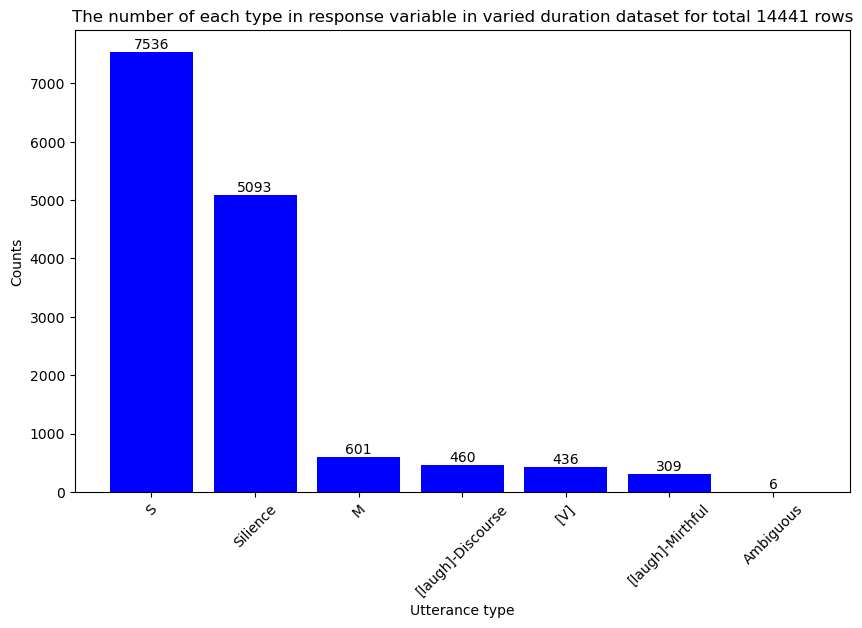

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
conside_column_name = 'concise merge type'
y_indepdent = data[conside_column_name]
y_indepdent_list = y_indepdent.tolist()
# Example list with values
values = y_indepdent_list
lenthvariable = len(values)
# Count each unique value using Counter and sort them in descending order
value_counts = Counter(values).most_common()

# Separate the keys (unique values) and their counts
labels, counts = zip(*value_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='blue')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('Utterance type')
plt.ylabel('Counts')
titleName ='The number of each type in response variable in varied duration dataset for total ' +str(lenthvariable)+" rows" 
plt.title(titleName)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
saveName =varidDurationPrefix+'labeled dsitribution.png'
plt.savefig(saveName)
plt.show()


# Spliting the data

In [9]:
conside_column_name = 'concise merge type'
y_indepdent = data[conside_column_name]
y_indepdent_list = y_indepdent.tolist()
y_indepdent_CV_LIST_unique = list(set(y_indepdent_list))

featurelist = get_featureList_index()

X_feature = data[featurelist]

X_acuostic_feature_numpy_array = X_feature.values

In [10]:
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'





X_feature_temp = X_feature
X_feature_temp.fillna(0, inplace=True)
X_acuostic_feature_numpy_array = X_feature_temp.values

y_indepdent_list = y_indepdent.tolist()


/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_5536/4065778589.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature_temp.fillna(0, inplace=True)


In [11]:
targetList = list(responseListresponseList)
utterance_type_mapping_dict = {utterance_type: idx for idx, utterance_type in enumerate(responseListresponseList)}
y_map = [utterance_type_mapping_dict[category] for category in y_indepdent_list]


In [12]:
utterance_type_mapping_dict

{'Ambiguous': 0,
 'M': 1,
 '[laugh]-Mirthful': 2,
 'S': 3,
 'Silience': 4,
 '[V]': 5,
 '[laugh]-Discourse': 6}

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_acuostic_feature_numpy_array)
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y_indepdent_list,
                                                        test_size=0.3, random_state=42)



In [14]:
targetList = list(responseListresponseList)
targetList

['Ambiguous',
 'M',
 '[laugh]-Mirthful',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse']

In [16]:
targetList

['Ambiguous',
 'Silience',
 'M',
 '[laugh]-Mirthful',
 '[V]',
 '[laugh]-Discourse',
 'S']

# Decision tree visualization

In [15]:
from sklearn.metrics import accuracy_score


clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=10,random_state=42,class_weight='balanced')
clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)


In [16]:
from sklearn import tree

import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=featurelist,
                                class_names=targetList,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
saveNameD = 'MutinomialModel-'+varidDurationPrefix+'-decsion.pdf'
graph.write_pdf(saveNameD)

True

# Multinoniral regression 

In [19]:
# https://www.geeksforgeeks.org/python-reversing-list/
# Reversing a list using slicing technique
def Reverse(lst):
   new_lst = lst[::-1]
   return new_lst

In [20]:
# Imbalanced data
# parameter setting adopt this work's parameter https://publications.scss.tcd.ie/theses/diss/2022/TCD-SCSS-DISSERTATION-2022-095.pdf
model = LogisticRegression (multi_class='multinomial', penalty='l2', solver='lbfgs',max_iter=1000,class_weight='balanced')
model.fit(x_train, y_train)

model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
mnr_accuracy = accuracy_score(y_test, y_test_pred)
print("Predication result is : " +str(mnr_accuracy))

# MUTINONIAL REGRESSION MORE THAN 500 discrinminating fearures
coefficients = pd.DataFrame(model.coef_, index=targetList, columns=featurelist)
#change to other luaghte type






/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predication result is : 0.8169859219939996


/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Select the specific laughter type of discinimating feature

In [21]:
# select model utterance
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'

#utter_type = discoureLaugh
list_of_laughter = ['[laugh]-Discourse', '[laugh]-Mirthful']

In [31]:
for utter_type in list_of_laughter:
  sizeOfGreathernCoeceint = len(coefficients.loc[utter_type][coefficients.loc[utter_type] > 0])
  print("the sixe of value is "+str(sizeOfGreathernCoeceint))
  sorted_coefficients = coefficients.loc[utter_type][coefficients.loc[utter_type] > 0].sort_values(ascending=True)
  discrinminatingFeatureSeries =  coefficients.loc[utter_type][coefficients.loc[utter_type] > 0].sort_values(ascending=True)
  import numpy as np
  import pandas as pd

  import scipy.stats as stats

  disending_oreder_discrinminating_featureList = Reverse(sorted_coefficients.index.tolist())
  feature_names = disending_oreder_discrinminating_featureList
  results = []

  for i in range(len(feature_names) - 1):
      feature_1 = feature_names[i]
      feature_2 = feature_names[i + 1]
      
      feature1Name = feature_1
    #  epsilon = 1e-6
    #  f_1list_modified = f_1list + epsilon
      f_1list = X_feature_temp[feature1Name].tolist()
      
      feature2Name = feature_2
      f_2list = X_feature_temp[feature2Name].tolist()
      differences = np.array(f_1list) - np.array(f_2list)
      if np.all(differences == 0):
        print("All differences are zero. Consider alternative analyses.")
        resultfromWilT = 0
        results.append({
          'Adjancey feature 1': feature_1,
          'Adjancey feature 2': feature_2,
          'P-Value': 0
          })
      else:
        resultfromWilT = stats.wilcoxon(f_1list, f_2list, zero_method='pratt')  # or 'wilcox'
        #print(resultfromWilT)
        stast, p_value  =resultfromWilT
        results.append({
          'Adjancey feature 1': feature_1,
          'Adjancey feature 2': feature_2,
          'P-Value': p_value
          })

  # Convert results to a DataFrame
  results_df = pd.DataFrame(results)
  #topNSaveName = 'mutlinomial'+'-adjaancyFeatureSignificantlist-Wilconx-Sign-Rank-test.csv'
  #results_df.to_csv(topNSaveName, index=True)
  # filter the feature correlation is great than 0.05 
  not_correlated_df = results_df[results_df['P-Value'] >= 0.05].copy()
  feature1Name = not_correlated_df['Adjancey feature 1'].tolist()
  feature2Name =not_correlated_df['Adjancey feature 2'].tolist()
  mergeList = feature2Name+feature1Name
  totalNameSet = list(set(mergeList))
  selected_rows_series = sorted_coefficients.loc[totalNameSet]
  # Convert the Series into a DataFrame
  selected_row_df = selected_rows_series.to_frame(name='Values')
  # Reset the index name
  selected_row_df = selected_row_df.reset_index().rename(columns={'index': 'Feature name'})
  selected_row_df = selected_row_df.sort_values(by='Values', ascending=False)
  selected_row_df = selected_row_df.reset_index(drop=True)
  topNSaveName = varidDurationPrefix+utter_type+'-DiscrinimatingFeatureListCoeffient-MultinomalTreeModel.csv'


  selected_row_df.to_csv(topNSaveName, index=True)
  final_discrinimianting_featureName = selected_row_df['Feature name'].tolist()
  final_featureDF = data[final_discrinimianting_featureName]
  print(len(final_featureDF))

  statisticTable_final_featureDF = final_featureDF.describe().T
  columns_to_drop = statisticTable_final_featureDF.columns[[0,4, 6]] 
  describe_final_info = statisticTable_final_featureDF.drop(columns=columns_to_drop)
  describe_final_info = describe_final_info.applymap(lambda x: f'{x:.3f}' if isinstance(x, (int, float)) else x)
  topNSaveName = varidDurationPrefix+utter_type+'-topN-Stastical-inforamtion-MultinomalTreeModel.csv'

  describe_final_info.to_csv(topNSaveName, index=True)
    
    

the sixe of value is 3156
All differences are zero. Consider alternative analyses.
All differences are zero. Consider alternative analyses.
All differences are zero. Consider alternative analyses.
All differences are zero. Consider alternative analyses.
14441
the sixe of value is 3231
All differences are zero. Consider alternative analyses.
All differences are zero. Consider alternative analyses.
All differences are zero. Consider alternative analyses.
14441


# Wilcox ranked test to determine the corrlation between adjancy feature in the ranked list

# Delete the edge has corrlection in the adjancey list 

# Statistic table

# Box plot to visalusazation

# Confusion matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
myreport  = classification_report(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

                   precision    recall  f1-score   support

                M       0.35      0.38      0.36       198
                S       0.88      0.86      0.87      2221
         Silience       0.89      0.91      0.90      1534
              [V]       0.48      0.54      0.51       130
[laugh]-Discourse       0.43      0.36      0.40       151
 [laugh]-Mirthful       0.39      0.40      0.40        99

         accuracy                           0.82      4333
        macro avg       0.57      0.58      0.57      4333
     weighted avg       0.82      0.82      0.82      4333



In [24]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

0.6998750261381242

In [25]:
sorted_list = sorted(targetList)
sorted_list

['Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful']

# Visualizae the feature name alphebtally 

In [26]:
labels

('S',
 'Silience',
 'M',
 '[laugh]-Discourse',
 '[V]',
 '[laugh]-Mirthful',
 'Ambiguous')

Confusion Matrix:
[[  75  105    6   11    0    1]
 [ 123 1909  115   41   20   13]
 [   7   88 1391   19   20    9]
 [   9   31   15   70    5    0]
 [   1   30   23    3   55   39]
 [   0   13   16    3   27   40]]

Confusion Matrix with Labels:
                     M     S  Silience  [V]  [laugh]-Discourse  \
M                   75   105         6   11                  0   
S                  123  1909       115   41                 20   
Silience             7    88      1391   19                 20   
[V]                  9    31        15   70                  5   
[laugh]-Discourse    1    30        23    3                 55   
[laugh]-Mirthful     0    13        16    3                 27   

                   [laugh]-Mirthful  
M                                 1  
S                                13  
Silience                          9  
[V]                               0  
[laugh]-Discourse                39  
[laugh]-Mirthful                 40  


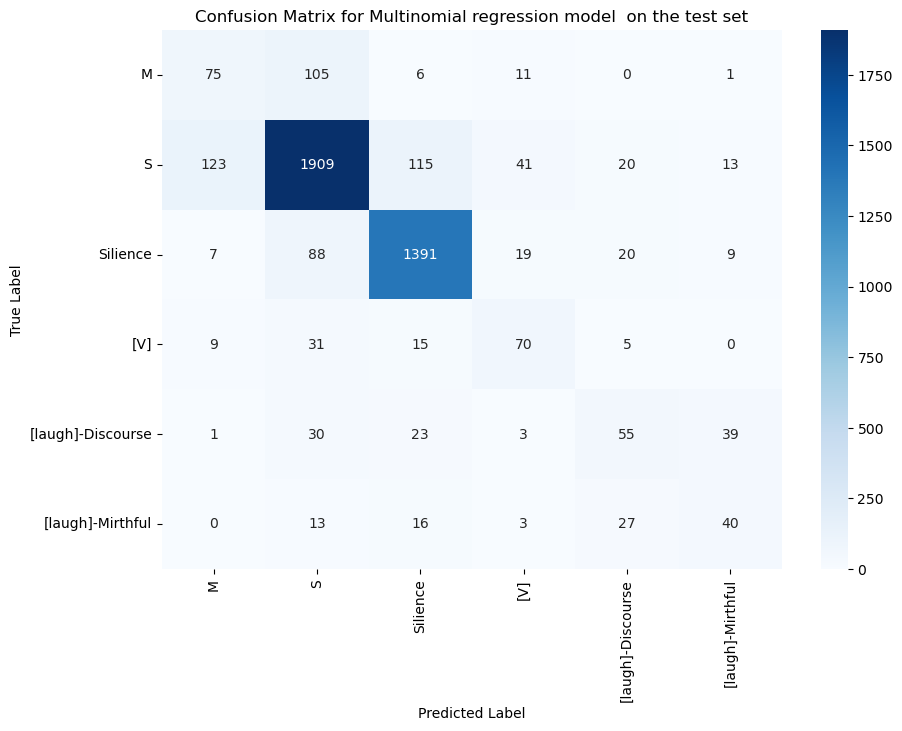

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Extract unique labels and sort them alphabetically
labels = np.unique(np.concatenate((y_test, y_test_pred))) 
sorted_labels = sorted(labels)

# Compute confusion matrix with sorted labels
cm = confusion_matrix(y_test, y_test_pred, labels=sorted_labels)

# Display the confusion matrix
print(f"Confusion Matrix:\n{cm}")

# If you want to display with labels for better readability
import pandas as pd

cm_df = pd.DataFrame(cm, index=sorted_labels, columns=sorted_labels)
print(f"\nConfusion Matrix with Labels:\n{cm_df}")
plt.figure(figsize=(10, 7))

# Generate and plot the confusion matrix
# Ensure the labels are sorted alphabetically
labels = np.unique(np.concatenate((y_test, y_test_pred)))  # Get all unique labels from test and predictions
labels.sort()  # Sort the labels alphabetically
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)


plt.xlabel('Predicted Label')
plt.ylabel('True Label')
title = 'Confusion Matrix for Multinomial regression model  on the test set' 
plt.title(title)
saveName =varidDurationPrefix+'-Mutinimal-confusionMatrix.png'
plt.savefig(saveName)
plt.show()


# Compute accuracy for each label

In [28]:
# Compute accuracy for each label
label_accuracies = {}

for i in range(len(cm)):
    correct_predictions = cm[i, i]
    total_predictions = np.sum(cm[i])
    label_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    label_accuracies[f'Label {i}'] = label_accuracy

# Print accuracies for each label
for label, accuracy in label_accuracies.items():
    print(f'Accuracy for {label}: {accuracy:.2f}')

Accuracy for Label 0: 0.38
Accuracy for Label 1: 0.86
Accuracy for Label 2: 0.91
Accuracy for Label 3: 0.54
Accuracy for Label 4: 0.36
Accuracy for Label 5: 0.40


In [29]:
targetList

['Ambiguous',
 'Silience',
 'M',
 '[laugh]-Mirthful',
 '[V]',
 '[laugh]-Discourse',
 'S']

Normality test